# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pp
import seaborn as sns
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# #url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# lat=30.5230
# lon=-87.9033
# api_key= weather_api_key
# units="imperial"
# weather_url=f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units={units}'
# print(weather_url)

# response=requests.get(weather_url)
# print(response.url)

# city_info=response.json()
# pp.pprint (city_info)

In [4]:
# city_lat = city_info['coord']['lat']
# print(city_lat)
# city_lng = city_info['coord']['lon']
# print(city_lng)
# city_max_temp = city_info['main']['temp_max']
# print(city_max_temp)
# city_humidity = city_info['main']['humidity']
# print(city_humidity)
# city_clouds = city_info['weather'][0]['main']
# print(city_clouds)
# city_wind = city_info['wind']['speed']
# print(city_wind)
# city_country = city_info['sys']['country']
# print(city_country)
# city_date = city_info['dt']
# print(city_date)

In [5]:
# Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    api_key= weather_api_key
    units="Imperial"
    city_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&APPID={weather_api_key}&q={city}"
    
    # Create endpoint URL with each city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
#         city_url=f'{base_url}&q={city}'
        response=requests.get(city_url)
        city_info = response.json()
#         print(response.url)
        pp.pprint(city_info)
        city_name=city_info['name']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_info['coord']['lat']
        print(city_lat)
        city_lng = city_info['coord']['lon']
        print(city_lng)
        city_max_temp = city_info['main']['temp_max']
        print(city_max_temp)
        city_humidity = city_info['main']['humidity']
        print(city_humidity)
        city_clouds = city_info['clouds']['all']
        print(city_clouds)
        city_wind = city_info['wind']['speed']
        print(city_wind)
        city_country = city_info['sys']['country']
        print(city_country)
        city_date = city_info['dt']
        print(city_date)

        # Append the City information into city_data list
    
        city_dict={ "City": city_name, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date}
        print(city_dict)
        
        city_data.append(city_dict)

    # If an error is experienced, skip the city
    except:
        print(f"City: {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
{'base': 'stations',
 'clouds': {'all': 34},
 'cod': 200,
 'coord': {'lat': -54.2811, 'lon': -36.5092},
 'dt': 1704662188,
 'id': 3426466,
 'main': {'feels_like': 39.61,
          'grnd_level': 1005,
          'humidity': 73,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 41.88,
          'temp_max': 41.88,
          'temp_min': 41.88},
 'name': 'Grytviken',
 'sys': {'country': 'GS', 'sunrise': 1704607448, 'sunset': 1704668375},
 'timezone': -7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 123, 'gust': 4.21, 'speed': 3.87}}
-54.2811
-36.5092
41.88
73
34
3.87
GS
1704662188
{'City': 'Grytviken', 'Lat': -54.2811, 'Lng': -36.5092, 'Max Temp': 41.88, 'Humidity': 73, 'Cloudiness': 34, 'Wind Speed': 3.87, 'Country': 'GS', 'Date': 1704

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 78.2186, 'lon': 15.6401},
 'dt': 1704662190,
 'id': 2729907,
 'main': {'feels_like': -11.36,
          'humidity': 60,
          'pressure': 1016,
          'temp': 1.24,
          'temp_max': 1.24,
          'temp_min': 1.24},
 'name': 'Longyearbyen',
 'sys': {'country': 'SJ', 'id': 1663, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 120, 'speed': 16.11}}
78.2186
15.6401
1.24
60
0
16.11
SJ
1704662190
{'City': 'Longyearbyen', 'Lat': 78.2186, 'Lng': 15.6401, 'Max Temp': 1.24, 'Humidity': 60, 'Cloudiness': 0, 'Wind Speed': 16.11, 'Country': 'SJ', 'Date': 1704662190}
Processing Record 11 of Set 1 | new norfolk
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -42.7826, 'lon': 147.0587},
 'dt': 1704662190,
 'id':

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -33.95, 'lon': 115.0667},
 'dt': 1704662191,
 'id': 2066981,
 'main': {'feels_like': 59.32,
          'grnd_level': 1002,
          'humidity': 81,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 59.83,
          'temp_max': 59.83,
          'temp_min': 59.83},
 'name': 'Margaret River',
 'sys': {'country': 'AU', 'sunrise': 1704662219, 'sunset': 1704713677},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 104, 'gust': 10.89, 'speed': 6.71}}
-33.95
115.0667
59.83
81
92
6.71
AU
1704662191
{'City': 'Margaret River', 'Lat': -33.95, 'Lng': 115.0667, 'Max Temp': 59.83, 'Humidity': 81, 'Cloudiness': 92, 'Wind Speed': 6.71, 'Country': 'AU', 'Date': 1704662191}
Processing Record 21 of Set 1 | port elizabeth
{'base': 'stations',
 'clouds': {'all': 20

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 41.3712, 'lon': -73.414},
 'dt': 1704662193,
 'id': 5282297,
 'main': {'feels_like': 31.32,
          'humidity': 82,
          'pressure': 1001,
          'temp': 31.32,
          'temp_max': 34.02,
          'temp_min': 28.06},
 'name': 'Bethel',
 'snow': {'1h': 0.25},
 'sys': {'country': 'US',
         'id': 2004826,
         'sunrise': 1704629977,
         'sunset': 1704663566,
         'type': 2},
 'timezone': -18000,
 'visibility': 3419,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 307, 'gust': 3, 'speed': 1.99}}
41.3712
-73.414
34.02
82
100
1.99
US
1704662193
{'City': 'Bethel', 'Lat': 41.3712, 'Lng': -73.414, 'Max Temp': 34.02, 'Humidity': 82, 'Cloudiness': 100, 'Wind Speed': 1.99, 'Country': 'US', 'Date': 1704662193}
Processing Record 31 of Set 1 | lahaina
{'base': 'stations',
 'clouds': {'all': 3},
 'c

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -51.7236, 'lon': -72.4875},
 'dt': 1704661943,
 'id': 3874958,
 'main': {'feels_like': 53.06,
          'humidity': 41,
          'pressure': 1004,
          'temp': 55.85,
          'temp_max': 55.85,
          'temp_min': 55.85},
 'name': 'Puerto Natales',
 'sys': {'country': 'CL',
         'id': 8495,
         'sunrise': 1704616973,
         'sunset': 1704676125,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'gust': 33.38, 'speed': 21.85}}
-51.7236
-72.4875
55.85
41
75
21.85
CL
1704661943
{'City': 'Puerto Natales', 'Lat': -51.7236, 'Lng': -72.4875, 'Max Temp': 55.85, 'Humidity': 41, 'Cloudiness': 75, 'Wind Speed': 21.85, 'Country': 'CL', 'Date': 1704661943}
Processing Record 40 of Set 1 | port sudan
{'base': 'stations',
 'clouds': {'all'

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': 51.2833, 'lon': 91.5833},
 'dt': 1704662196,
 'id': 1508501,
 'main': {'feels_like': -6.18,
          'grnd_level': 930,
          'humidity': 98,
          'pressure': 1037,
          'sea_level': 1037,
          'temp': -6.18,
          'temp_max': -6.18,
          'temp_min': -6.18},
 'name': 'Chadan',
 'sys': {'country': 'RU', 'sunrise': 1704678993, 'sunset': 1704708179},
 'timezone': 25200,
 'visibility': 3528,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'gust': 1.5, 'speed': 1.5}}
51.2833
91.5833
-6.18
98
95
1.5
RU
1704662196
{'City': 'Chadan', 'Lat': 51.2833, 'Lng': 91.5833, 'Max Temp': -6.18, 'Humidity': 98, 'Cloudiness': 95, 'Wind Speed': 1.5, 'Country': 'RU', 'Date': 1704662196}
Processing Record 50 of Set 1 | revda
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -3.3667, 'lon': 135.4833},
 'dt': 1704662197,
 'id': 1634614,
 'main': {'feels_like': 76.75,
          'grnd_level': 1010,
          'humidity': 94,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 75.11,
          'temp_max': 75.11,
          'temp_min': 75.11},
 'name': 'Nabire',
 'sys': {'country': 'ID', 'sunrise': 1704660898, 'sunset': 1704705196},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 133, 'gust': 2.82, 'speed': 2.77}}
-3.3667
135.4833
75.11
94
100
2.77
ID
1704662197
{'City': 'Nabire', 'Lat': -3.3667, 'Lng': 135.4833, 'Max Temp': 75.11, 'Humidity': 94, 'Cloudiness': 100, 'Wind Speed': 2.77, 'Country': 'ID', 'Date': 1704662197}
Processing Record 8 of Set 2 | victorica
{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.5, 'lon': 92},
 'dt': 1704662199,
 'id': 1280517,
 'main': {'feels_like': -3.62,
          'grnd_level': 576,
          'humidity': 50,
          'pressure': 1026,
          'sea_level': 1026,
          'temp': 4.37,
          'temp_max': 4.37,
          'temp_min': 4.37},
 'name': 'Nagqu Prefecture',
 'sys': {'country': 'CN', 'sunrise': 1704675127, 'sunset': 1704711844},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 99, 'gust': 3.62, 'speed': 3.87}}
31.5
92
4.37
50
0
3.87
CN
1704662199
{'City': 'Nagqu Prefecture', 'Lat': 31.5, 'Lng': 92, 'Max Temp': 4.37, 'Humidity': 50, 'Cloudiness': 0, 'Wind Speed': 3.87, 'Country': 'CN', 'Date': 1704662199}
Processing Record 18 of Set 2 | tamanrasset
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.785, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 2.7858, 'lon': 24.73},
 'dt': 1704662201,
 'id': 217570,
 'main': {'feels_like': 69.73,
          'grnd_level': 965,
          'humidity': 40,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 71.04,
          'temp_max': 71.04,
          'temp_min': 71.04},
 'name': 'Buta',
 'sys': {'country': 'CD', 'sunrise': 1704601671, 'sunset': 1704644749},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'gust': 1.63, 'speed': 0.47}}
2.7858
24.73
71.04
40
20
0.47
CD
1704662201
{'City': 'Buta', 'Lat': 2.7858, 'Lng': 24.73, 'Max Temp': 71.04, 'Humidity': 40, 'Cloudiness': 20, 'Wind Speed': 0.47, 'Country': 'CD', 'Date': 1704662201}
Processing Record 27 of Set 2 | limanowa
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 49.7059, '

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -4.3614, 'lon': 14.7644},
 'dt': 1704662202,
 'id': 2258984,
 'main': {'feels_like': 72.43,
          'grnd_level': 962,
          'humidity': 93,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 71.24,
          'temp_max': 71.24,
          'temp_min': 71.24},
 'name': 'Kinkala',
 'sys': {'country': 'CG', 'sunrise': 1704603353, 'sunset': 1704647852},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 277, 'gust': 2.51, 'speed': 2.48}}
-4.3614
14.7644
71.24
93
99
2.48
CG
1704662202
{'City': 'Kinkala', 'Lat': -4.3614, 'Lng': 14.7644, 'Max Temp': 71.24, 'Humidity': 93, 'Cloudiness': 99, 'Wind Speed': 2.48, 'Country': 'CG', 'Date': 1704662202}
Processing Record 36 of Set 2 | calama
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 11.2833, 'lon': -15.8333},
 'dt': 1704662204,
 'id': 2374583,
 'main': {'feels_like': 82.71,
          'grnd_level': 1010,
          'humidity': 65,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 80.24,
          'temp_max': 80.24,
          'temp_min': 80.24},
 'name': 'Bubaque',
 'sys': {'country': 'GW', 'sunrise': 1704612262, 'sunset': 1704653634},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 276, 'gust': 15.23, 'speed': 11.95}}
11.2833
-15.8333
80.24
65
20
11.95
GW
1704662204
{'City': 'Bubaque', 'Lat': 11.2833, 'Lng': -15.8333, 'Max Temp': 80.24, 'Humidity': 65, 'Cloudiness': 20, 'Wind Speed': 11.95, 'Country': 'GW', 'Date': 1704662204}
Processing Record 45 of Set 2 | el nido
{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord'

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 19.5933, 'lon': -154.9731},
 'dt': 1704662205,
 'id': 5855809,
 'main': {'feels_like': 75.2,
          'humidity': 91,
          'pressure': 1018,
          'temp': 73.83,
          'temp_max': 78.31,
          'temp_min': 72.73},
 'name': 'Hawaiian Paradise Park',
 'rain': {'1h': 2.04},
 'sys': {'country': 'US',
         'id': 2087107,
         'sunrise': 1704646544,
         'sunset': 1704686159,
         'type': 2},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 140, 'speed': 9.22}}
19.5933
-154.9731
78.31
91
40
9.22
US
1704662205
{'City': 'Hawaiian Paradise Park', 'Lat': 19.5933, 'Lng': -154.9731, 'Max Temp': 78.31, 'Humidity': 91, 'Cloudiness': 40, 'Wind Speed': 9.22, 'Country': 'US', 'Date': 1704662205}
Processing Record 6 of Set 3 | necochea
{'base': 'stations',

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -38.7, 'lon': -73.1667},
 'dt': 1704662212,
 'id': 3896774,
 'main': {'feels_like': 65.44,
          'grnd_level': 1007,
          'humidity': 45,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 66.94,
          'temp_max': 66.94,
          'temp_min': 66.94},
 'name': 'Carahue',
 'sys': {'country': 'CL', 'sunrise': 1704620187, 'sunset': 1704673237},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 242, 'gust': 12.5, 'speed': 9.22}}
-38.7
-73.1667
66.94
45
1
9.22
CL
1704662212
{'City': 'Carahue', 'Lat': -38.7, 'Lng': -73.1667, 'Max Temp': 66.94, 'Humidity': 45, 'Cloudiness': 1, 'Wind Speed': 9.22, 'Country': 'CL', 'Date': 1704662212}
Processing Record 15 of Set 3 | thompson
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat':

{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'coord': {'lat': 43.3236, 'lon': 145.575},
 'dt': 1704662214,
 'id': 2128975,
 'main': {'feels_like': 18.19,
          'grnd_level': 1000,
          'humidity': 75,
          'pressure': 1003,
          'sea_level': 1003,
          'temp': 27.88,
          'temp_max': 27.88,
          'temp_min': 27.88},
 'name': 'Nemuro',
 'sys': {'country': 'JP', 'sunrise': 1704664185, 'sunset': 1704697063},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 335, 'gust': 13.31, 'speed': 10.78}}
43.3236
145.575
27.88
75
16
10.78
JP
1704662214
{'City': 'Nemuro', 'Lat': 43.3236, 'Lng': 145.575, 'Max Temp': 27.88, 'Humidity': 75, 'Cloudiness': 16, 'Wind Speed': 10.78, 'Country': 'JP', 'Date': 1704662214}
Processing Record 24 of Set 3 | hinton
{'base': 'stations',
 'clouds': {'all': 13},
 'cod': 200,
 'coord': 

{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -34.4187, 'lon': 19.2345},
 'dt': 1704662215,
 'id': 3366880,
 'main': {'feels_like': 63.45,
          'grnd_level': 1017,
          'humidity': 71,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 64,
          'temp_max': 64,
          'temp_min': 64},
 'name': 'Hermanus',
 'sys': {'country': 'ZA', 'sunrise': 1704598709, 'sunset': 1704650349},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 123, 'gust': 12.48, 'speed': 8.39}}
-34.4187
19.2345
64
71
96
8.39
ZA
1704662215
{'City': 'Hermanus', 'Lat': -34.4187, 'Lng': 19.2345, 'Max Temp': 64, 'Humidity': 71, 'Cloudiness': 96, 'Wind Speed': 8.39, 'Country': 'ZA', 'Date': 1704662215}
Processing Record 35 of Set 3 | vadso
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat':

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 43.0362, 'lon': -70.8328},
 'dt': 1704662216,
 'id': 5086915,
 'main': {'feels_like': 9.34,
          'humidity': 91,
          'pressure': 1005,
          'temp': 21.94,
          'temp_max': 26.85,
          'temp_min': 19.27},
 'name': 'Greenland',
 'snow': {'1h': 0.36},
 'sys': {'country': 'US',
         'id': 2021817,
         'sunrise': 1704629671,
         'sunset': 1704662633,
         'type': 2},
 'timezone': -18000,
 'visibility': 201,
 'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'},
             {'description': 'heavy snow',
              'icon': '13d',
              'id': 602,
              'main': 'Snow'}],
 'wind': {'deg': 360, 'gust': 21.85, 'speed': 16.11}}
43.0362
-70.8328
26.85
91
100
16.11
US
1704662216
{'City': 'Greenland', 'Lat': 43.0362, 'Lng': -70.8328, 'Max Temp': 26.85, 'Humidity': 91, 'Cloudiness': 100, 'Wind Speed': 16.11, 'Country': 'US', 'Date': 1704662

{'base': 'stations',
 'clouds': {'all': 25},
 'cod': 200,
 'coord': {'lat': 12.0333, 'lon': -61.6667},
 'dt': 1704662218,
 'id': 3579931,
 'main': {'feels_like': 84.11,
          'grnd_level': 1008,
          'humidity': 73,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 80.44,
          'temp_max': 80.44,
          'temp_min': 80.44},
 'name': 'Saint David’s',
 'sys': {'country': 'GD', 'sunrise': 1704623341, 'sunset': 1704664561},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 82, 'gust': 16.02, 'speed': 12.71}}
12.0333
-61.6667
80.44
73
25
12.71
GD
1704662218
{'City': 'Saint David’s', 'Lat': 12.0333, 'Lng': -61.6667, 'Max Temp': 80.44, 'Humidity': 73, 'Cloudiness': 25, 'Wind Speed': 12.71, 'Country': 'GD', 'Date': 1704662218}
Processing Record 5 of Set 4 | sur
{'base': 'stations',
 'clouds': {'all': 46},
 'co

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 37.7333, 'lon': -25.6667},
 'dt': 1704662219,
 'id': 3372783,
 'main': {'feels_like': 60.53,
          'humidity': 67,
          'pressure': 1016,
          'temp': 61.52,
          'temp_max': 61.52,
          'temp_min': 61.52},
 'name': 'Ponta Delgada',
 'sys': {'country': 'PT',
         'id': 6899,
         'sunrise': 1704617893,
         'sunset': 1704652724,
         'type': 1},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'speed': 16.11}}
37.7333
-25.6667
61.52
67
20
16.11
PT
1704662219
{'City': 'Ponta Delgada', 'Lat': 37.7333, 'Lng': -25.6667, 'Max Temp': 61.52, 'Humidity': 67, 'Cloudiness': 20, 'Wind Speed': 16.11, 'Country': 'PT', 'Date': 1704662219}
Processing Record 15 of Set 4 | saipan
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.6711, 'lon': -8.1474},
 'dt': 1704662225,
 'id': 2476301,
 'main': {'feels_like': 58.77,
          'humidity': 36,
          'pressure': 1020,
          'temp': 61.25,
          'temp_max': 61.25,
          'temp_min': 61.25},
 'name': 'Tindouf',
 'sys': {'country': 'DZ',
         'id': 1081,
         'sunrise': 1704612256,
         'sunset': 1704649950,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'speed': 4.61}}
27.6711
-8.1474
61.25
36
0
4.61
DZ
1704662225
{'City': 'Tindouf', 'Lat': 27.6711, 'Lng': -8.1474, 'Max Temp': 61.25, 'Humidity': 36, 'Cloudiness': 0, 'Wind Speed': 4.61, 'Country': 'DZ', 'Date': 1704662225}
Processing Record 25 of Set 4 | sarikei
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 2.1167, 'lon

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -37.8333, 'lon': 140.7667},
 'dt': 1704662230,
 'id': 2156643,
 'main': {'feels_like': 61.03,
          'grnd_level': 1004,
          'humidity': 94,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 60.84,
          'temp_max': 60.84,
          'temp_min': 60.84},
 'name': 'Mount Gambier',
 'sys': {'country': 'AU', 'sunrise': 1704655417, 'sunset': 1704708140},
 'timezone': 37800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 177, 'gust': 25.37, 'speed': 11.48}}
-37.8333
140.7667
60.84
94
100
11.48
AU
1704662230
{'City': 'Mount Gambier', 'Lat': -37.8333, 'Lng': 140.7667, 'Max Temp': 60.84, 'Humidity': 94, 'Cloudiness': 100, 'Wind Speed': 11.48, 'Country': 'AU', 'Date': 1704662230}
Processing Record 34 of Set 4 | uvinza
{'base': 'stations',
 'clouds': {'all': 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 4.9167, 'lon': -52.2667},
 'dt': 1704662233,
 'id': 3380892,
 'main': {'feels_like': 87.03,
          'humidity': 69,
          'pressure': 1012,
          'temp': 82.44,
          'temp_max': 82.44,
          'temp_min': 82.44},
 'name': 'Rémire-Montjoly',
 'sys': {'country': 'GF',
         'id': 8669,
         'sunrise': 1704620366,
         'sunset': 1704663023,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 6.91}}
4.9167
-52.2667
82.44
69
0
6.91
GF
1704662233
{'City': 'Rémire-Montjoly', 'Lat': 4.9167, 'Lng': -52.2667, 'Max Temp': 82.44, 'Humidity': 69, 'Cloudiness': 0, 'Wind Speed': 6.91, 'Country': 'GF', 'Date': 1704662233}
Processing Record 43 of Set 4 | ola
{'base': 'stations',
 'clouds': {'all': 19},
 'cod': 200,
 'coord': {'lat': 

{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': 5.6947, 'lon': -76.6611},
 'dt': 1704662235,
 'id': 3671116,
 'main': {'feels_like': 97.21,
          'grnd_level': 1001,
          'humidity': 74,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 86.13,
          'temp_max': 86.13,
          'temp_min': 86.13},
 'name': 'Quibdó',
 'sys': {'country': 'CO', 'sunrise': 1704626300, 'sunset': 1704668802},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 327, 'gust': 5.7, 'speed': 2.42}}
5.6947
-76.6611
86.13
74
78
2.42
CO
1704662235
{'City': 'Quibdó', 'Lat': 5.6947, 'Lng': -76.6611, 'Max Temp': 86.13, 'Humidity': 74, 'Cloudiness': 78, 'Wind Speed': 2.42, 'Country': 'CO', 'Date': 1704662235}
Processing Record 2 of Set 5 | urumqi
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'l

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34.5322, 'lon': 20.0403},
 'dt': 1704662241,
 'id': 1015776,
 'main': {'feels_like': 62.42,
          'grnd_level': 1012,
          'humidity': 69,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 63.16,
          'temp_max': 63.16,
          'temp_min': 63.16},
 'name': 'Bredasdorp',
 'sys': {'country': 'ZA', 'sunrise': 1704598498, 'sunset': 1704650174},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 116, 'gust': 4.27, 'speed': 2.73}}
-34.5322
20.0403
63.16
69
76
2.73
ZA
1704662241
{'City': 'Bredasdorp', 'Lat': -34.5322, 'Lng': 20.0403, 'Max Temp': 63.16, 'Humidity': 69, 'Cloudiness': 76, 'Wind Speed': 2.73, 'Country': 'ZA', 'Date': 1704662241}
Processing Record 12 of Set 5 | badger
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 '

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 41.9174, 'lon': 3.1631},
 'dt': 1704662247,
 'id': 3114567,
 'main': {'feels_like': 34.59,
          'grnd_level': 1005,
          'humidity': 9,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 42.91,
          'temp_max': 44.46,
          'temp_min': 39.96},
 'name': 'Palafrugell',
 'sys': {'country': 'ES',
         'id': 20782,
         'sunrise': 1704611701,
         'sunset': 1704645074,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 339, 'gust': 26.04, 'speed': 18.75}}
41.9174
3.1631
44.46
9
92
18.75
ES
1704662247
{'City': 'Palafrugell', 'Lat': 41.9174, 'Lng': 3.1631, 'Max Temp': 44.46, 'Humidity': 9, 'Cloudiness': 92, 'Wind Speed': 18.75, 'Country': 'ES', 'Date': 1704662247}
Processing Record 22 of Set 5 | fort st

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 65.5333, 'lon': 72.5167},
 'dt': 1704662254,
 'id': 1498087,
 'main': {'feels_like': -18.8,
          'grnd_level': 1006,
          'humidity': 96,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': -6.2,
          'temp_max': -6.2,
          'temp_min': -6.2},
 'name': 'Nadym',
 'sys': {'country': 'RU', 'sunrise': 1704690944, 'sunset': 1704705382},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 159, 'gust': 6.82, 'speed': 6.78}}
65.5333
72.5167
-6.2
96
100
6.78
RU
1704662254
{'City': 'Nadym', 'Lat': 65.5333, 'Lng': 72.5167, 'Max Temp': -6.2, 'Humidity': 96, 'Cloudiness': 100, 'Wind Speed': 6.78, 'Country': 'RU', 'Date': 1704662254}
Processing Record 33 of Set 5 | tromso
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'l

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': 18.4167, 'lon': 84.05},
 'dt': 1704662255,
 'id': 1261853,
 'main': {'feels_like': 65.44,
          'grnd_level': 1013,
          'humidity': 80,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 65.44,
          'temp_max': 65.44,
          'temp_min': 65.44},
 'name': 'Narasannapeta',
 'sys': {'country': 'IN', 'sunrise': 1704675454, 'sunset': 1704715335},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 354, 'gust': 6.67, 'speed': 5.59}}
18.4167
84.05
65.44
80
9
5.59
IN
1704662255
{'City': 'Narasannapeta', 'Lat': 18.4167, 'Lng': 84.05, 'Max Temp': 65.44, 'Humidity': 80, 'Cloudiness': 9, 'Wind Speed': 5.59, 'Country': 'IN', 'Date': 1704662255}
Processing Record 42 of Set 5 | ar ruways
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord':

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 21.9789, 'lon': -159.3672},
 'dt': 1704661968,
 'id': 5850248,
 'main': {'feels_like': 78.12,
          'humidity': 76,
          'pressure': 1016,
          'temp': 77.13,
          'temp_max': 79.84,
          'temp_min': 76.59},
 'name': 'Lihue',
 'sys': {'country': 'US',
         'id': 7873,
         'sunrise': 1704647868,
         'sunset': 1704686945,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 190, 'speed': 11.5}}
21.9789
-159.3672
79.84
76
75
11.5
US
1704661968
{'City': 'Lihue', 'Lat': 21.9789, 'Lng': -159.3672, 'Max Temp': 79.84, 'Humidity': 76, 'Cloudiness': 75, 'Wind Speed': 11.5, 'Country': 'US', 'Date': 1704661968}
Processing Record 4 of Set 6 | sao gabriel da cachoeira
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 200,
 'coord'

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.4397, 'lon': 71.7603},
 'dt': 1704662258,
 'id': 7287775,
 'main': {'feels_like': -14.89,
          'grnd_level': 993,
          'humidity': 98,
          'pressure': 1004,
          'sea_level': 1004,
          'temp': -2.29,
          'temp_max': -2.29,
          'temp_min': -2.29},
 'name': 'Nizhnesortymskiy',
 'snow': {'1h': 0.18},
 'sys': {'country': 'RU', 'sunrise': 1704688481, 'sunset': 1704708209},
 'timezone': 18000,
 'visibility': 134,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 94, 'gust': 22.32, 'speed': 13.24}}
62.4397
71.7603
-2.29
98
100
13.24
RU
1704662258
{'City': 'Nizhnesortymskiy', 'Lat': 62.4397, 'Lng': 71.7603, 'Max Temp': -2.29, 'Humidity': 98, 'Cloudiness': 100, 'Wind Speed': 13.24, 'Country': 'RU', 'Date': 1704662258}
Processing Record 14 of Set 6 | karratha
{'base': 'stations',
 'cl

{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 8.9322, 'lon': 165.7642},
 'dt': 1704662259,
 'id': 7306519,
 'main': {'feels_like': 84.7,
          'grnd_level': 1013,
          'humidity': 68,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 81.25,
          'temp_max': 81.25,
          'temp_min': 81.25},
 'name': 'Ujae',
 'sys': {'country': 'MH', 'sunrise': 1704654849, 'sunset': 1704696706},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 75, 'gust': 20.98, 'speed': 19.44}}
8.9322
165.7642
81.25
68
97
19.44
MH
1704662259
{'City': 'Ujae', 'Lat': 8.9322, 'Lng': 165.7642, 'Max Temp': 81.25, 'Humidity': 68, 'Cloudiness': 97, 'Wind Speed': 19.44, 'Country': 'MH', 'Date': 1704662259}
Processing Record 23 of Set 6 | kidal
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -38.7187, 'lon': -61.2873},
 'dt': 1704662260,
 'id': 3860199,
 'main': {'feels_like': 65.77,
          'grnd_level': 994,
          'humidity': 73,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 66.04,
          'temp_max': 66.04,
          'temp_min': 66.04},
 'name': 'Coronel Dorrego',
 'sys': {'country': 'AR', 'sunrise': 1704617331, 'sunset': 1704670390},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 335, 'gust': 20.78, 'speed': 16.06}}
-38.7187
-61.2873
66.04
73
99
16.06
AR
1704662260
{'City': 'Coronel Dorrego', 'Lat': -38.7187, 'Lng': -61.2873, 'Max Temp': 66.04, 'Humidity': 73, 'Cloudiness': 99, 'Wind Speed': 16.06, 'Country': 'AR', 'Date': 1704662260}
Processing Record 33 of Set 6 | namibe
{'base': 'stations',
 'clouds': {'all':

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -17.9333, 'lon': 19.7667},
 'dt': 1704662262,
 'id': 3353383,
 'main': {'feels_like': 70.63,
          'grnd_level': 891,
          'humidity': 81,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 70.11,
          'temp_max': 70.11,
          'temp_min': 70.11},
 'name': 'Rundu',
 'sys': {'country': 'NA', 'sunrise': 1704600728, 'sunset': 1704648075},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 5, 'gust': 1.97, 'speed': 1.7}}
-17.9333
19.7667
70.11
81
100
1.7
NA
1704662262
{'City': 'Rundu', 'Lat': -17.9333, 'Lng': 19.7667, 'Max Temp': 70.11, 'Humidity': 81, 'Cloudiness': 100, 'Wind Speed': 1.7, 'Country': 'NA', 'Date': 1704662262}
Processing Record 43 of Set 6 | prince rupert
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coor

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': 69.4005, 'lon': 32.4476},
 'dt': 1704662263,
 'id': 828218,
 'main': {'feels_like': 10.47,
          'grnd_level': 994,
          'humidity': 85,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 23.07,
          'temp_max': 23.07,
          'temp_min': 23.07},
 'name': 'Zaozërsk',
 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 283, 'gust': 37.33, 'speed': 22.68}}
69.4005
32.4476
23.07
85
49
22.68
RU
1704662263
{'City': 'Zaozërsk', 'Lat': 69.4005, 'Lng': 32.4476, 'Max Temp': 23.07, 'Humidity': 85, 'Cloudiness': 49, 'Wind Speed': 22.68, 'Country': 'RU', 'Date': 1704662263}
Processing Record 4 of Set 7 | north vernon
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'la

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32.8112, 'lon': -115.3803},
 'dt': 1704662265,
 'id': 5357598,
 'main': {'feels_like': 59.23,
          'humidity': 16,
          'pressure': 1010,
          'temp': 62.53,
          'temp_max': 64.27,
          'temp_min': 61.03},
 'name': 'Holtville',
 'sys': {'country': 'US',
         'id': 4540,
         'sunrise': 1704638680,
         'sunset': 1704675013,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'gust': 49.48, 'speed': 21.85}}
32.8112
-115.3803
64.27
16
0
21.85
US
1704662265
{'City': 'Holtville', 'Lat': 32.8112, 'Lng': -115.3803, 'Max Temp': 64.27, 'Humidity': 16, 'Cloudiness': 0, 'Wind Speed': 21.85, 'Country': 'US', 'Date': 1704662265}
Processing Record 13 of Set 7 | krasnyy kut
{'base': 'stations',
 'clouds': {'all': 51},
 'cod': 20

{'base': 'stations',
 'clouds': {'all': 26},
 'cod': 200,
 'coord': {'lat': 10.6162, 'lon': 47.368},
 'dt': 1704662267,
 'id': 62691,
 'main': {'feels_like': 53.64,
          'grnd_level': 827,
          'humidity': 43,
          'pressure': 1018,
          'sea_level': 1018,
          'temp': 56.28,
          'temp_max': 56.28,
          'temp_min': 56.28},
 'name': 'Erigavo',
 'sys': {'country': 'SO', 'sunrise': 1704683441, 'sunset': 1704724961},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 15, 'gust': 16.24, 'speed': 9.78}}
10.6162
47.368
56.28
43
26
9.78
SO
1704662267
{'City': 'Erigavo', 'Lat': 10.6162, 'Lng': 47.368, 'Max Temp': 56.28, 'Humidity': 43, 'Cloudiness': 26, 'Wind Speed': 9.78, 'Country': 'SO', 'Date': 1704662267}
Processing Record 23 of Set 7 | lodja
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 17.5928, 'lon': 33.9592},
 'dt': 1704662268,
 'id': 380173,
 'main': {'feels_like': 73.81,
          'grnd_level': 974,
          'humidity': 32,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 75.09,
          'temp_max': 75.09,
          'temp_min': 75.09},
 'name': 'Ed Damer',
 'sys': {'country': 'SD', 'sunrise': 1704600973, 'sunset': 1704641015},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 360, 'gust': 19.35, 'speed': 10.87}}
17.5928
33.9592
75.09
32
0
10.87
SD
1704662268
{'City': 'Ed Damer', 'Lat': 17.5928, 'Lng': 33.9592, 'Max Temp': 75.09, 'Humidity': 32, 'Cloudiness': 0, 'Wind Speed': 10.87, 'Country': 'SD', 'Date': 1704662268}
Processing Record 34 of Set 7 | katagum
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'la

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.2041, 'lon': 25.5195},
 'dt': 1704662269,
 'id': 347863,
 'main': {'feels_like': 52.05,
          'grnd_level': 1021,
          'humidity': 27,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 55.53,
          'temp_max': 55.53,
          'temp_min': 55.53},
 'name': 'Sīwah',
 'sys': {'country': 'EG', 'sunrise': 1704604372, 'sunset': 1704641669},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 282, 'gust': 10.47, 'speed': 9.06}}
29.2041
25.5195
55.53
27
0
9.06
EG
1704662269
{'City': 'Sīwah', 'Lat': 29.2041, 'Lng': 25.5195, 'Max Temp': 55.53, 'Humidity': 27, 'Cloudiness': 0, 'Wind Speed': 9.06, 'Country': 'EG', 'Date': 1704662269}
Processing Record 45 of Set 7 | nerchinsk
{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 51

{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': 56.1325, 'lon': 101.6142},
 'dt': 1704662271,
 'id': 2051523,
 'main': {'feels_like': -12.89,
          'grnd_level': 971,
          'humidity': 100,
          'pressure': 1032,
          'sea_level': 1032,
          'temp': -5.31,
          'temp_max': -5.31,
          'temp_min': -5.31},
 'name': 'Bratsk',
 'sys': {'country': 'RU',
         'id': 8892,
         'sunrise': 1704678163,
         'sunset': 1704704193,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 269, 'gust': 2.95, 'speed': 3}}
56.1325
101.6142
-5.31
100
62
3
RU
1704662271
{'City': 'Bratsk', 'Lat': 56.1325, 'Lng': 101.6142, 'Max Temp': -5.31, 'Humidity': 100, 'Cloudiness': 62, 'Wind Speed': 3, 'Country': 'RU', 'Date': 1704662271}
Processing Record 5 of Set 8 | liaozhong
{'base': 's

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66, 'lon': 111.5},
 'dt': 1704662272,
 'id': 2027296,
 'main': {'feels_like': -28.05,
          'grnd_level': 948,
          'humidity': 99,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': -15.45,
          'temp_max': -15.45,
          'temp_min': -15.45},
 'name': 'Aykhal',
 'sys': {'country': 'RU', 'sunrise': 1704682149, 'sunset': 1704695460},
 'timezone': 32400,
 'visibility': 1291,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 311, 'gust': 4.52, 'speed': 4.97}}
66
111.5
-15.45
99
100
4.97
RU
1704662272
{'City': 'Aykhal', 'Lat': 66, 'Lng': 111.5, 'Max Temp': -15.45, 'Humidity': 99, 'Cloudiness': 100, 'Wind Speed': 4.97, 'Country': 'RU', 'Date': 1704662272}
Processing Record 16 of Set 8 | bismarck
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 46

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 63.2842, 'lon': 118.3319},
 'dt': 1704662274,
 'id': 2018735,
 'main': {'feels_like': -13.38,
          'grnd_level': 994,
          'humidity': 99,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': -13.38,
          'temp_max': -13.38,
          'temp_min': -13.38},
 'name': 'Nyurba',
 'sys': {'country': 'RU', 'sunrise': 1704677919, 'sunset': 1704696410},
 'timezone': 32400,
 'visibility': 433,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 326, 'gust': 0.96, 'speed': 0.78}}
63.2842
118.3319
-13.38
99
99
0.78
RU
1704662274
{'City': 'Nyurba', 'Lat': 63.2842, 'Lng': 118.3319, 'Max Temp': -13.38, 'Humidity': 99, 'Cloudiness': 99, 'Wind Speed': 0.78, 'Country': 'RU', 'Date': 1704662274}
Processing Record 27 of Set 8 | lock haven
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 38.0386, 'lon': 14.0229},
 'dt': 1704662275,
 'id': 2525041,
 'main': {'feels_like': 48.31,
          'humidity': 64,
          'pressure': 1004,
          'temp': 50.54,
          'temp_max': 54.54,
          'temp_min': 48.99},
 'name': 'Cefalù',
 'sys': {'country': 'IT',
         'id': 2009312,
         'sunrise': 1704608418,
         'sunset': 1704643143,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 293, 'gust': 21.99, 'speed': 18.99}}
38.0386
14.0229
54.54
64
56
18.99
IT
1704662275
{'City': 'Cefalù', 'Lat': 38.0386, 'Lng': 14.0229, 'Max Temp': 54.54, 'Humidity': 64, 'Cloudiness': 56, 'Wind Speed': 18.99, 'Country': 'IT', 'Date': 1704662275}
Processing Record 37 of Set 8 | puerto deseado
{'base': 'stations',
 'clouds': {'all': 87},
 'cod': 20

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.4515, 'lon': 151.8468},
 'dt': 1704662276,
 'id': 2081114,
 'main': {'feels_like': 86.81,
          'grnd_level': 1011,
          'humidity': 66,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 82.71,
          'temp_max': 82.71,
          'temp_min': 82.71},
 'name': 'Weno',
 'sys': {'country': 'FM', 'sunrise': 1704658041, 'sunset': 1704700196},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'gust': 23.62, 'speed': 21.9}}
7.4515
151.8468
82.71
66
100
21.9
FM
1704662276
{'City': 'Weno', 'Lat': 7.4515, 'Lng': 151.8468, 'Max Temp': 82.71, 'Humidity': 66, 'Cloudiness': 100, 'Wind Speed': 21.9, 'Country': 'FM', 'Date': 1704662276}
Processing Record 48 of Set 8 | chicxulub puerto
{'cod': '404', 'message': 'city not found'}
City: chicxulu

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -31.95, 'lon': 141.4333},
 'dt': 1704662282,
 'id': 2173911,
 'main': {'feels_like': 68.34,
          'grnd_level': 975,
          'humidity': 76,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 68.25,
          'temp_max': 68.25,
          'temp_min': 68.25},
 'name': 'Broken Hill',
 'sys': {'country': 'AU', 'sunrise': 1704656186, 'sunset': 1704707050},
 'timezone': 37800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 207, 'gust': 17.18, 'speed': 14.54}}
-31.95
141.4333
68.25
76
0
14.54
AU
1704662282
{'City': 'Broken Hill', 'Lat': -31.95, 'Lng': 141.4333, 'Max Temp': 68.25, 'Humidity': 76, 'Cloudiness': 0, 'Wind Speed': 14.54, 'Country': 'AU', 'Date': 1704662282}
Processing Record 9 of Set 9 | masonboro
{'base': 'stations',
 'clouds': {'all': 16},
 'cod': 200,
 'co

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': -29.9002, 'lon': -50.0904},
 'dt': 1704662284,
 'id': 3467362,
 'main': {'feels_like': 78.33,
          'grnd_level': 1007,
          'humidity': 86,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 76.89,
          'temp_max': 76.89,
          'temp_min': 76.89},
 'name': 'Santa Terezinha',
 'sys': {'country': 'BR', 'sunrise': 1704616021, 'sunset': 1704666323},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 19, 'gust': 19.86, 'speed': 11.95}}
-29.9002
-50.0904
76.89
86
42
11.95
BR
1704662284
{'City': 'Santa Terezinha', 'Lat': -29.9002, 'Lng': -50.0904, 'Max Temp': 76.89, 'Humidity': 86, 'Cloudiness': 42, 'Wind Speed': 11.95, 'Country': 'BR', 'Date': 1704662284}
Processing Record 19 of Set 9 | miyanoura
{'cod': '404', 'message': 'city not

{'base': 'stations',
 'clouds': {'all': 83},
 'cod': 200,
 'coord': {'lat': -4.352, 'lon': 152.2633},
 'dt': 1704662285,
 'id': 2093685,
 'main': {'feels_like': 79.59,
          'grnd_level': 1000,
          'humidity': 82,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 79.59,
          'temp_max': 79.59,
          'temp_min': 79.59},
 'name': 'Kokopo',
 'sys': {'country': 'PG', 'sunrise': 1704656771, 'sunset': 1704701265},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 271, 'gust': 3.51, 'speed': 2.15}}
-4.352
152.2633
79.59
82
83
2.15
PG
1704662285
{'City': 'Kokopo', 'Lat': -4.352, 'Lng': 152.2633, 'Max Temp': 79.59, 'Humidity': 82, 'Cloudiness': 83, 'Wind Speed': 2.15, 'Country': 'PG', 'Date': 1704662285}
Processing Record 31 of Set 9 | laibin
{'base': 'stations',
 'clouds': {'all': 71},
 'cod': 200,
 'coord': {

{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': 15.0286, 'lon': 120.6898},
 'dt': 1704662286,
 'id': 1690039,
 'main': {'feels_like': 76.06,
          'grnd_level': 1012,
          'humidity': 84,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 74.93,
          'temp_max': 74.93,
          'temp_min': 74.93},
 'name': 'San Fernando',
 'sys': {'country': 'PH',
         'id': 8152,
         'sunrise': 1704666296,
         'sunset': 1704706901,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 14, 'gust': 5.48, 'speed': 4.36}}
15.0286
120.6898
74.93
84
54
4.36
PH
1704662286
{'City': 'San Fernando', 'Lat': 15.0286, 'Lng': 120.6898, 'Max Temp': 74.93, 'Humidity': 84, 'Cloudiness': 54, 'Wind Speed': 4.36, 'Country': 'PH', 'Date': 1704662286}
Processing Record 41 of Set 9 | jal

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -10.4217, 'lon': 105.6791},
 'dt': 1704662287,
 'id': 2078127,
 'main': {'feels_like': 78.46,
          'humidity': 94,
          'pressure': 1011,
          'temp': 76.68,
          'temp_max': 76.68,
          'temp_min': 76.68},
 'name': 'Flying Fish Cove',
 'rain': {'1h': 0.86},
 'sys': {'country': 'CX',
         'id': 9592,
         'sunrise': 1704667341,
         'sunset': 1704713063,
         'type': 1},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 200, 'speed': 3.44}}
-10.4217
105.6791
76.68
94
75
3.44
CX
1704662287
{'City': 'Flying Fish Cove', 'Lat': -10.4217, 'Lng': 105.6791, 'Max Temp': 76.68, 'Humidity': 94, 'Cloudiness': 75, 'Wind Speed': 3.44, 'Country': 'CX', 'Date': 1704662287}
Processing Record 2 of Set 10 | sydney mines
{'base': 'stations',
 'clouds': {

{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': -17.5, 'lon': 24.2667},
 'dt': 1704662289,
 'id': 877178,
 'main': {'feels_like': 73.98,
          'grnd_level': 908,
          'humidity': 58,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 74.14,
          'temp_max': 74.14,
          'temp_min': 74.14},
 'name': 'Katima Mulilo',
 'sys': {'country': 'NA', 'sunrise': 1704599696, 'sunset': 1704646946},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 5, 'gust': 5.17, 'speed': 4.38}}
-17.5
24.2667
74.14
58
21
4.38
NA
1704662289
{'City': 'Katima Mulilo', 'Lat': -17.5, 'Lng': 24.2667, 'Max Temp': 74.14, 'Humidity': 58, 'Cloudiness': 21, 'Wind Speed': 4.38, 'Country': 'NA', 'Date': 1704662289}
Processing Record 12 of Set 10 | saint-philippe
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 '

{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': 50.3833, 'lon': 116.5167},
 'dt': 1704662290,
 'id': 2026126,
 'main': {'feels_like': -20.6,
          'grnd_level': 931,
          'humidity': 97,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': -20.6,
          'temp_max': -20.6,
          'temp_min': -20.6},
 'name': 'Borzya',
 'sys': {'country': 'RU', 'sunrise': 1704672764, 'sunset': 1704702436},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 291, 'gust': 2.86, 'speed': 1.36}}
50.3833
116.5167
-20.6
97
54
1.36
RU
1704662290
{'City': 'Borzya', 'Lat': 50.3833, 'Lng': 116.5167, 'Max Temp': -20.6, 'Humidity': 97, 'Cloudiness': 54, 'Wind Speed': 1.36, 'Country': 'RU', 'Date': 1704662290}
Processing Record 23 of Set 10 | santarem
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coor

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32.7668, 'lon': -96.5992},
 'dt': 1704662160,
 'id': 4710826,
 'main': {'feels_like': 57.83,
          'humidity': 46,
          'pressure': 1011,
          'temp': 59.97,
          'temp_max': 61.52,
          'temp_min': 58.01},
 'name': 'Mesquite',
 'sys': {'country': 'US',
         'id': 2006149,
         'sunrise': 1704634166,
         'sunset': 1704670509,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'gust': 23.02, 'speed': 13.8}}
32.7668
-96.5992
61.52
46
0
13.8
US
1704662160
{'City': 'Mesquite', 'Lat': 32.7668, 'Lng': -96.5992, 'Max Temp': 61.52, 'Humidity': 46, 'Cloudiness': 0, 'Wind Speed': 13.8, 'Country': 'US', 'Date': 1704662160}
Processing Record 32 of Set 10 | hameenlinna
{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': -24.7911, 'lon': -50.0119},
 'dt': 1704662248,
 'id': 3466704,
 'main': {'feels_like': 79.68,
          'grnd_level': 902,
          'humidity': 57,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 79.68,
          'temp_max': 79.68,
          'temp_min': 79.68},
 'name': 'Castro',
 'sys': {'country': 'BR', 'sunrise': 1704616674, 'sunset': 1704665633},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 62, 'gust': 2.24, 'speed': 1.5}}
-24.7911
-50.0119
79.68
57
42
1.5
BR
1704662248
{'City': 'Castro', 'Lat': -24.7911, 'Lng': -50.0119, 'Max Temp': 79.68, 'Humidity': 57, 'Cloudiness': 42, 'Wind Speed': 1.5, 'Country': 'BR', 'Date': 1704662248}
Processing Record 43 of Set 10 | puerto baquerizo moreno
{'base': 'stations',
 'clouds': {'all': 20},
 

{'base': 'stations',
 'clouds': {'all': 33},
 'cod': 200,
 'coord': {'lat': 2.7739, 'lon': 27.616},
 'dt': 1704662293,
 'id': 215771,
 'main': {'feels_like': 66.29,
          'grnd_level': 926,
          'humidity': 42,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 67.84,
          'temp_max': 67.84,
          'temp_min': 67.84},
 'name': 'Isiro',
 'sys': {'country': 'CD', 'sunrise': 1704600977, 'sunset': 1704644058},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'gust': 3.06, 'speed': 3}}
2.7739
27.616
67.84
42
33
3
CD
1704662293
{'City': 'Isiro', 'Lat': 2.7739, 'Lng': 27.616, 'Max Temp': 67.84, 'Humidity': 42, 'Cloudiness': 33, 'Wind Speed': 3, 'Country': 'CD', 'Date': 1704662293}
Processing Record 2 of Set 11 | windhoek
{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': -22.5594,

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 45.4094, 'lon': 141.6739},
 'dt': 1704662294,
 'id': 2127515,
 'main': {'feels_like': 15.15,
          'humidity': 77,
          'pressure': 1009,
          'temp': 25.09,
          'temp_max': 25.09,
          'temp_min': 25.09},
 'name': 'Wakkanai',
 'sys': {'country': 'JP',
         'id': 2084466,
         'sunrise': 1704665546,
         'sunset': 1704697576,
         'type': 2},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'gust': 18.01, 'speed': 10}}
45.4094
141.6739
25.09
77
100
10
JP
1704662294
{'City': 'Wakkanai', 'Lat': 45.4094, 'Lng': 141.6739, 'Max Temp': 25.09, 'Humidity': 77, 'Cloudiness': 100, 'Wind Speed': 10, 'Country': 'JP', 'Date': 1704662294}
Processing Record 12 of Set 11 | pahrump
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,


{'base': 'stations',
 'clouds': {'all': 58},
 'cod': 200,
 'coord': {'lat': 5.3505, 'lon': 48.5268},
 'dt': 1704662296,
 'id': 57000,
 'main': {'feels_like': 77.52,
          'grnd_level': 1013,
          'humidity': 72,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 76.77,
          'temp_max': 76.77,
          'temp_min': 76.77},
 'name': 'Hobyo',
 'sys': {'country': 'SO', 'sunrise': 1704682635, 'sunset': 1704725210},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 57, 'gust': 32.01, 'speed': 22.41}}
5.3505
48.5268
76.77
72
58
22.41
SO
1704662296
{'City': 'Hobyo', 'Lat': 5.3505, 'Lng': 48.5268, 'Max Temp': 76.77, 'Humidity': 72, 'Cloudiness': 58, 'Wind Speed': 22.41, 'Country': 'SO', 'Date': 1704662296}
Processing Record 21 of Set 11 | duong dong
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -17.8786, 'lon': 36.8883},
 'dt': 1704662297,
 'id': 1028434,
 'main': {'feels_like': 85.93,
          'humidity': 83,
          'pressure': 1013,
          'temp': 80.55,
          'temp_max': 80.55,
          'temp_min': 80.55},
 'name': 'Quelimane',
 'sys': {'country': 'MZ',
         'id': 2208,
         'sunrise': 1704596624,
         'sunset': 1704643959,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 80, 'speed': 3.44}}
-17.8786
36.8883
80.55
83
40
3.44
MZ
1704662297
{'City': 'Quelimane', 'Lat': -17.8786, 'Lng': 36.8883, 'Max Temp': 80.55, 'Humidity': 83, 'Cloudiness': 40, 'Wind Speed': 3.44, 'Country': 'MZ', 'Date': 1704662297}
Processing Record 30 of Set 11 | ballycastle
{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord':

{'base': 'stations',
 'clouds': {'all': 94},
 'cod': 200,
 'coord': {'lat': 65.441, 'lon': 52.1498},
 'dt': 1704662298,
 'id': 477940,
 'main': {'feels_like': -5.12,
          'humidity': 97,
          'pressure': 1008,
          'temp': 4.6,
          'temp_max': 4.6,
          'temp_min': 4.6},
 'name': 'Ust-Tsilma',
 'sys': {'country': 'RU',
         'id': 2088263,
         'sunrise': 1704695724,
         'sunset': 1704710382,
         'type': 2},
 'timezone': 10800,
 'visibility': 2893,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 293, 'gust': 20, 'speed': 5.01}}
65.441
52.1498
4.6
97
94
5.01
RU
1704662298
{'City': 'Ust-Tsilma', 'Lat': 65.441, 'Lng': 52.1498, 'Max Temp': 4.6, 'Humidity': 97, 'Cloudiness': 94, 'Wind Speed': 5.01, 'Country': 'RU', 'Date': 1704662298}
Processing Record 40 of Set 11 | sorong
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'l

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -9.6658, 'lon': -35.7353},
 'dt': 1704662299,
 'id': 3395981,
 'main': {'feels_like': 87.01,
          'humidity': 74,
          'pressure': 1012,
          'temp': 81.84,
          'temp_max': 81.84,
          'temp_min': 81.84},
 'name': 'Maceió',
 'sys': {'country': 'BR',
         'id': 8413,
         'sunrise': 1704614939,
         'sunset': 1704660513,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 13.8}}
-9.6658
-35.7353
81.84
74
0
13.8
BR
1704662299
{'City': 'Maceió', 'Lat': -9.6658, 'Lng': -35.7353, 'Max Temp': 81.84, 'Humidity': 74, 'Cloudiness': 0, 'Wind Speed': 13.8, 'Country': 'BR', 'Date': 1704662299}
Processing Record 0 of Set 12 | shizunai-furukawacho
{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat'

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.298, 'lon': 74.8093},
 'dt': 1704662300,
 'id': 1273892,
 'main': {'feels_like': 44.37,
          'grnd_level': 985,
          'humidity': 52,
          'pressure': 1019,
          'sea_level': 1019,
          'temp': 46.24,
          'temp_max': 46.24,
          'temp_min': 46.24},
 'name': 'Jasrasar',
 'sys': {'country': 'IN', 'sunrise': 1704678831, 'sunset': 1704716395},
 'timezone': 19800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 76, 'gust': 4.23, 'speed': 4.21}}
28.298
74.8093
46.24
52
0
4.21
IN
1704662300
{'City': 'Jasrasar', 'Lat': 28.298, 'Lng': 74.8093, 'Max Temp': 46.24, 'Humidity': 52, 'Cloudiness': 0, 'Wind Speed': 4.21, 'Country': 'IN', 'Date': 1704662300}
Processing Record 10 of Set 12 | east london
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'la

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -10.1256, 'lon': -36.1756},
 'dt': 1704662302,
 'id': 3465329,
 'main': {'feels_like': 79.79,
          'grnd_level': 1009,
          'humidity': 72,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 79.79,
          'temp_max': 79.79,
          'temp_min': 79.79},
 'name': 'Coruripe',
 'sys': {'country': 'BR', 'sunrise': 1704614997, 'sunset': 1704660666},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 79, 'gust': 19.04, 'speed': 12.46}}
-10.1256
-36.1756
79.79
72
0
12.46
BR
1704662302
{'City': 'Coruripe', 'Lat': -10.1256, 'Lng': -36.1756, 'Max Temp': 79.79, 'Humidity': 72, 'Cloudiness': 0, 'Wind Speed': 12.46, 'Country': 'BR', 'Date': 1704662302}
Processing Record 21 of Set 12 | darwin
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'co

{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': -27.7507, 'lon': -57.6207},
 'dt': 1704662303,
 'id': 3430402,
 'main': {'feels_like': 101.03,
          'grnd_level': 995,
          'humidity': 41,
          'pressure': 1003,
          'sea_level': 1003,
          'temp': 95.77,
          'temp_max': 95.77,
          'temp_min': 95.77},
 'name': 'Nuestra Señora del Rosario de Caa Catí',
 'sys': {'country': 'AR', 'sunrise': 1704618121, 'sunset': 1704667839},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 55, 'gust': 6.76, 'speed': 6.33}}
-27.7507
-57.6207
95.77
41
79
6.33
AR
1704662303
{'City': 'Nuestra Señora del Rosario de Caa Catí', 'Lat': -27.7507, 'Lng': -57.6207, 'Max Temp': 95.77, 'Humidity': 41, 'Cloudiness': 79, 'Wind Speed': 6.33, 'Country': 'AR', 'Date': 1704662303}
Processing Record 30 of Set 12 | mount

{'base': 'stations',
 'clouds': {'all': 98},
 'cod': 200,
 'coord': {'lat': -2.0226, 'lon': 147.2712},
 'dt': 1704662304,
 'id': 2092164,
 'main': {'feels_like': 88.09,
          'grnd_level': 1010,
          'humidity': 79,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 81.81,
          'temp_max': 81.81,
          'temp_min': 81.81},
 'name': 'Lorengau',
 'sys': {'country': 'PG', 'sunrise': 1704658201, 'sunset': 1704702232},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 33, 'gust': 6.78, 'speed': 4.68}}
-2.0226
147.2712
81.81
79
98
4.68
PG
1704662304
{'City': 'Lorengau', 'Lat': -2.0226, 'Lng': 147.2712, 'Max Temp': 81.81, 'Humidity': 79, 'Cloudiness': 98, 'Wind Speed': 4.68, 'Country': 'PG', 'Date': 1704662304}
Processing Record 41 of Set 12 | andergrove
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 20

In [6]:
pp.pprint(city_data)

[{'City': 'Grytviken',
  'Cloudiness': 34,
  'Country': 'GS',
  'Date': 1704662188,
  'Humidity': 73,
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 41.88,
  'Wind Speed': 3.87},
 {'City': 'Tazovsky',
  'Cloudiness': 56,
  'Country': 'RU',
  'Date': 1704662189,
  'Humidity': 97,
  'Lat': 67.4667,
  'Lng': 78.7,
  'Max Temp': -12.37,
  'Wind Speed': 7.27},
 {'City': 'Carnarvon',
  'Cloudiness': 0,
  'Country': 'AU',
  'Date': 1704662189,
  'Humidity': 85,
  'Lat': -24.8667,
  'Lng': 113.6333,
  'Max Temp': 72.82,
  'Wind Speed': 14.03},
 {'City': 'Mahdia',
  'Cloudiness': 2,
  'Country': 'TN',
  'Date': 1704662189,
  'Humidity': 60,
  'Lat': 35.5047,
  'Lng': 11.0622,
  'Max Temp': 49.95,
  'Wind Speed': 17.16},
 {'City': 'Ribeira Grande',
  'Cloudiness': 40,
  'Country': 'PT',
  'Date': 1704662189,
  'Humidity': 77,
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 61.2,
  'Wind Speed': 18.41},
 {'City': 'Adamstown',
  'Cloudiness': 100,
  'Country': 'PN',
  'Date': 1704662189,
  'H

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Grytviken,-54.2811,-36.5092,41.88,73,34,3.87,GS,1704662188
1,Tazovsky,67.4667,78.7000,-12.37,97,56,7.27,RU,1704662189
2,Carnarvon,-24.8667,113.6333,72.82,85,0,14.03,AU,1704662189
3,Mahdia,35.5047,11.0622,49.95,60,2,17.16,TN,1704662189
4,Ribeira Grande,38.5167,-28.7000,61.20,77,40,18.41,PT,1704662189


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Grytviken,-54.2811,-36.5092,41.88,73,34,3.87,GS,1704662188
1,Tazovsky,67.4667,78.7000,-12.37,97,56,7.27,RU,1704662189
2,Carnarvon,-24.8667,113.6333,72.82,85,0,14.03,AU,1704662189
3,Mahdia,35.5047,11.0622,49.95,60,2,17.16,TN,1704662189
4,Ribeira Grande,38.5167,-28.7000,61.20,77,40,18.41,PT,1704662189


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

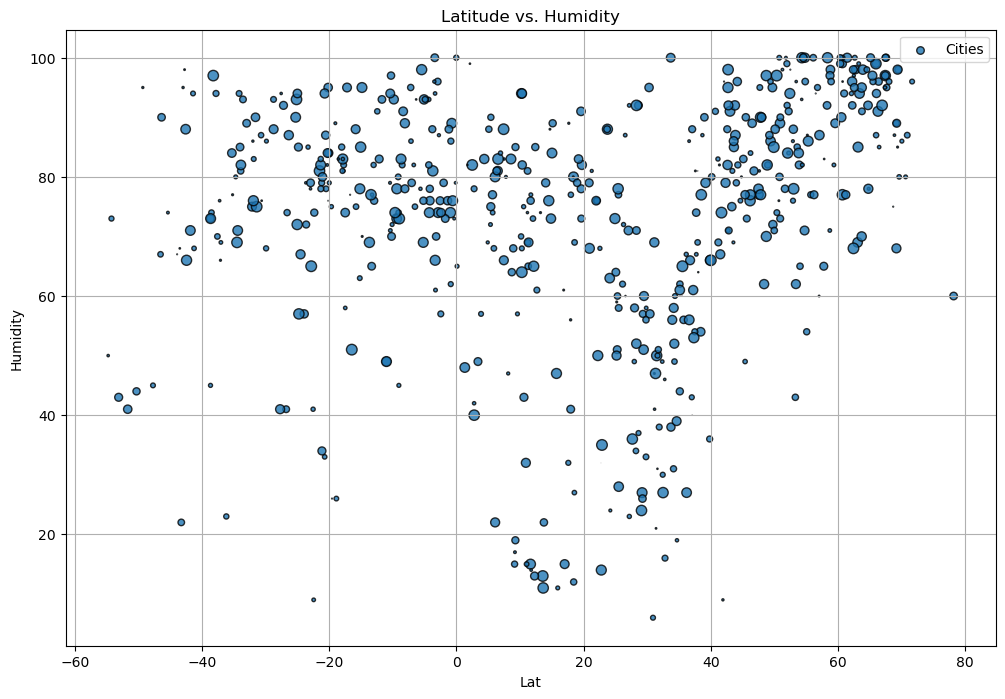

In [32]:
N=len(city_data_df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**1.2  # 0 to 15 point radii
city_data_df.plot.scatter(x='Lat',y='Humidity', edgecolor="black", linewidths=1, marker="o", alpha=0.8, s=area, title='Latitude vs. Humidity', grid=True, figsize=(12,8),label="Cities")
# plt.title('Latitude vs. Temp')
plt.savefig("output_data/lat_vs_hum_s.png")
# Show plot
plt.show()

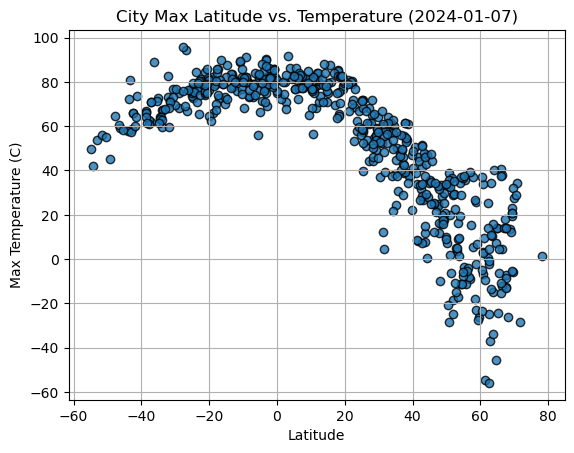

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

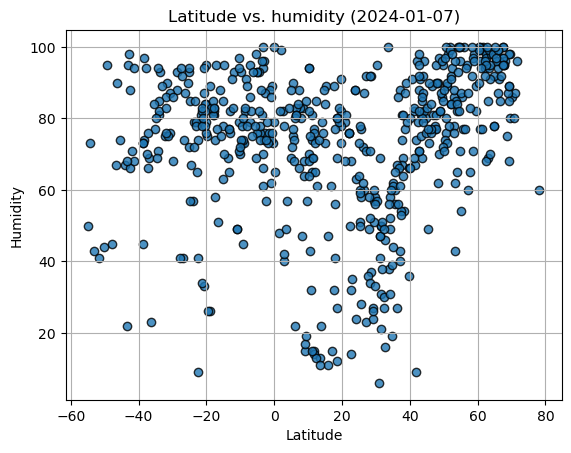

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
plt.title("Latitude vs. humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

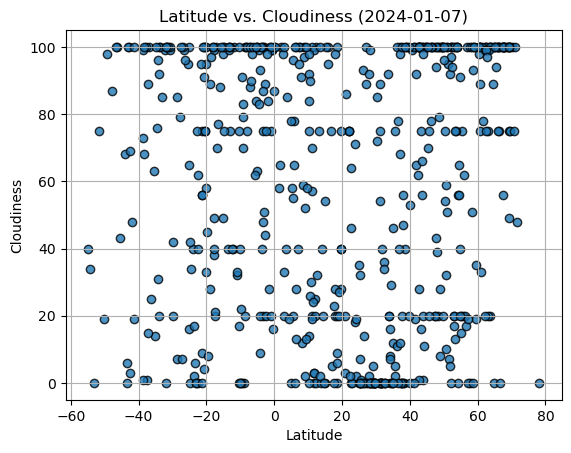

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
    
)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

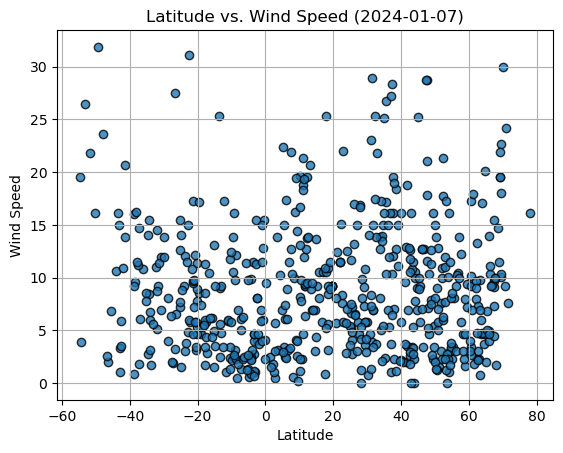

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# # Define a function to create Linear Regression plots

# def plot_linear_regression(x_values, y_values, title, text_coordinates):
    

    
#     # Compute linear regression
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
   

In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Tazovsky,67.4667,78.7000,-12.37,97,56,7.27,RU,1704662189
3,Mahdia,35.5047,11.0622,49.95,60,2,17.16,TN,1704662189
4,Ribeira Grande,38.5167,-28.7000,61.20,77,40,18.41,PT,1704662189
6,Ketchikan,55.3422,-131.6461,35.58,86,75,3.44,US,1704662189
9,Longyearbyen,78.2186,15.6401,1.24,60,0,16.11,SJ,1704662190


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Grytviken,-54.2811,-36.5092,41.88,73,34,3.87,GS,1704662188
2,Carnarvon,-24.8667,113.6333,72.82,85,0,14.03,AU,1704662189
5,Adamstown,-25.0660,-130.1015,73.42,72,100,15.50,PN,1704662189
7,São Vicente,-23.9631,-46.3919,84.38,57,40,9.22,BR,1704662190
8,Punta Arenas,-53.1500,-70.9167,53.71,43,0,26.46,CL,1704662190


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7525810890420621


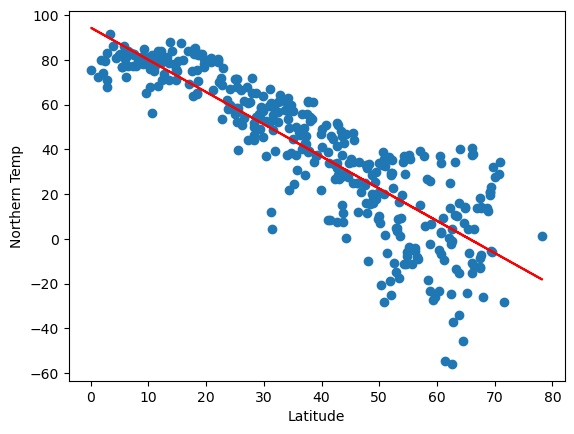

In [41]:

 plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Northern Temp",(-40,20))



The r-value is: 0.4585773100719676


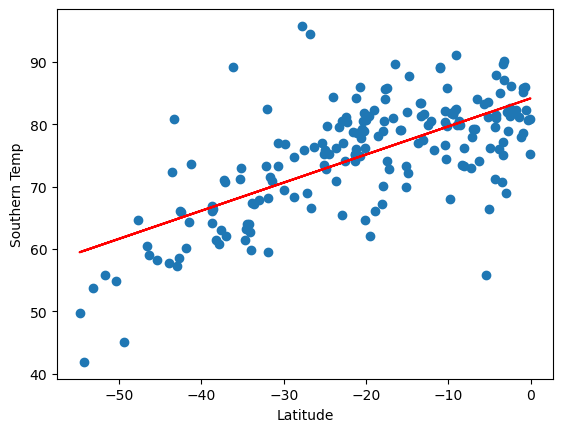

In [42]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Southern Temp",(-40,20))

**Discussion about the linear relationship:** Both northern and Sourthern Hemisphere Temp and Latitude  have a postive correlation.  the higher the Temperature Closer to the equator. the r value is high

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22726749773620109


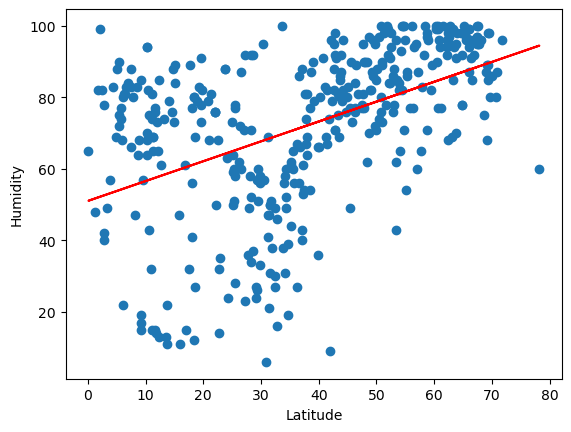

In [43]:
# Linear regression on Northern Hemisphere

plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity",(-40,20))

plt.show()

The r-value is: 0.041873270476052764


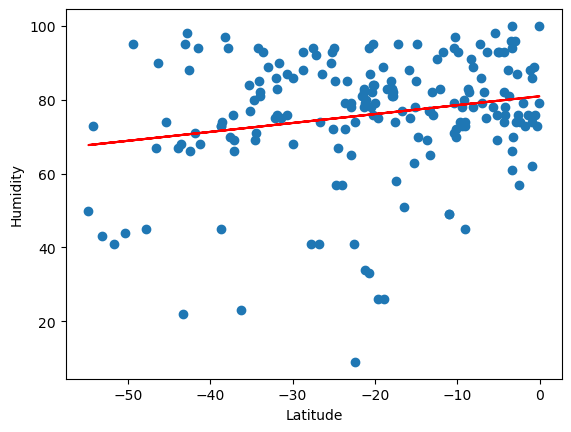

In [44]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity",(-60,20))

plt.show()

**Discussion about the linear relationship:** It looks like there is little to no relationship. the r value is very small.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0865251979788822


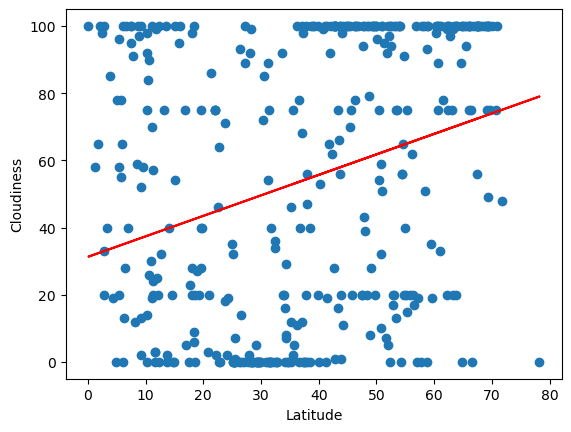

In [45]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",(-40,20))

plt.show()

The r-value is: 0.012476001988334583


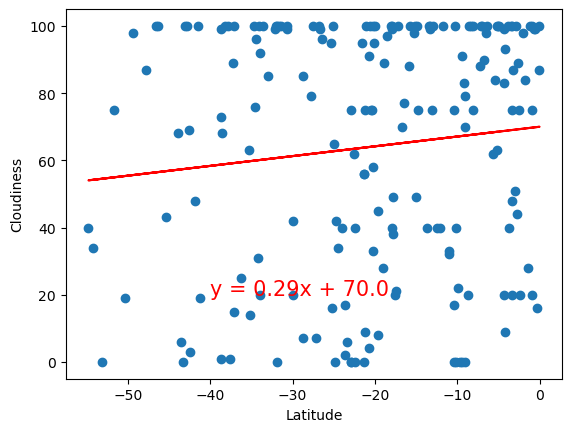

In [46]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",(-40,20))

plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere the chart show a positive correlation but based on r value the relationship is minimal.  Chart is misleading.
Southern chart show zero to no relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 3.2198261236105084e-06


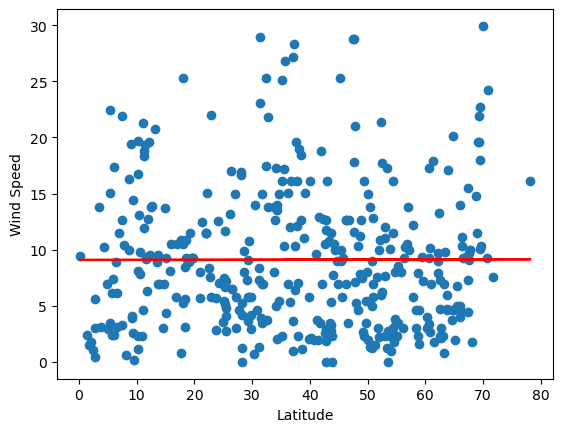

In [47]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed",(-40,20))

plt.show()

The r-value is: 0.12134625160176114


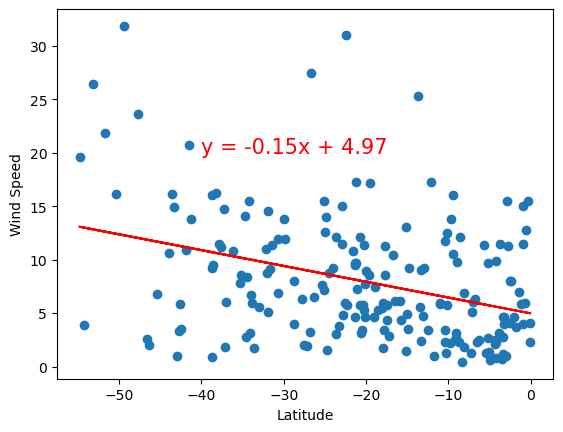

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed",(-40,20))

plt.show()

**Discussion about the linear relationship:** relation ship for both hemispere is weak